<a href="https://colab.research.google.com/github/himanithakar1002/TransferLearning/blob/main/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **20MCS0029 | Transfer Learning**

In [19]:
 pip install tensorflow_hub

In [20]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [22]:
from google.colab import files

uploded=files.upload()

Saving goldfish.jpg to goldfish.jpg


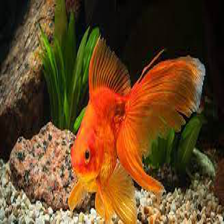

In [23]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [24]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [25]:
gold_fish[np.newaxis, ...]

array([[[[0.03529412, 0.04313725, 0.03921569],
         [0.03529412, 0.04313725, 0.03921569],
         [0.03137255, 0.03921569, 0.03529412],
         ...,
         [0.01176471, 0.01176471, 0.00392157],
         [0.00784314, 0.00784314, 0.        ],
         [0.00784314, 0.00784314, 0.        ]],

        [[0.03529412, 0.04313725, 0.03921569],
         [0.03529412, 0.04313725, 0.03921569],
         [0.03137255, 0.03921569, 0.03529412],
         ...,
         [0.01176471, 0.01176471, 0.00392157],
         [0.00784314, 0.00784314, 0.        ],
         [0.00784314, 0.00784314, 0.        ]],

        [[0.03529412, 0.04313725, 0.03921569],
         [0.03529412, 0.04313725, 0.03921569],
         [0.03137255, 0.03921569, 0.03529412],
         ...,
         [0.01176471, 0.01176471, 0.00392157],
         [0.00784314, 0.00784314, 0.        ],
         [0.00784314, 0.00784314, 0.        ]],

        ...,

        [[0.58823529, 0.64313725, 0.55294118],
         [0.63921569, 0.68627451, 0.59215686]

In [26]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [27]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [31]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')


'/root/.keras/datasets/ImageNetLabels.txt'

In [35]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [36]:
data_dir


'./datasets/flower_photos'

In [37]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

In [38]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [40]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/18760363474_a707331322_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1392579828_ab5a139052.jpg'),
 PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg')]

In [42]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [43]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [44]:

flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2448812029_047d981092_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/18760363474_a707331322_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1392579828_ab5a139052.jpg'),
 PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg')]

In [46]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/2448812029_047d981092_m.jpg'

In [47]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [48]:
img.shape

(240, 240, 3)

In [49]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [50]:

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [51]:

X = np.array(X)
y = np.array(y)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [53]:
X[0].shape

(224, 224, 3)

In [54]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [61]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

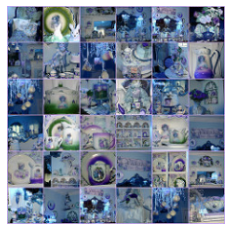

In [62]:
plt.axis('off')
plt.imshow(X[0])

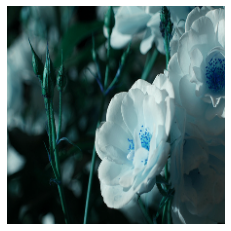

In [63]:
plt.axis('off')
plt.imshow(X[1])

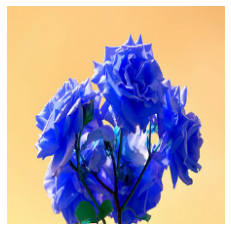

In [57]:
plt.axis('off')
plt.imshow(X[2])

In [60]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 550])

In [66]:

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [67]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [71]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 94s 1s/step - loss: 1.1570 - acc: 0.5499
Epoch 2/5
86/86 [==============================] - 90s 1s/step - loss: 0.4271 - acc: 0.8687
Epoch 3/5
86/86 [==============================] - 90s 1s/step - loss: 0.3474 - acc: 0.8916
Epoch 4/5
86/86 [==============================] - 92s 1s/step - loss: 0.2845 - acc: 0.9111
Epoch 5/5
86/86 [==============================] - 91s 1s/step - loss: 0.2486 - acc: 0.9250


In [72]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 31s 1s/step - loss: 0.3599 - acc: 0.8693


[0.3598528504371643, 0.8692810535430908]